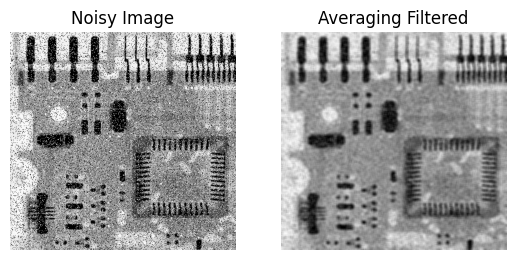

In [1]:

import cv2
from matplotlib import pyplot as plt

# Load a noisy grayscale image
img = cv2.imread("noisysalterpepper.png")

# Apply averaging filter (mean filter) with a 3x3 kernel
mean_filtered = cv2.blur(img, (7,6))

# Display
plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title('Noisy Image'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(mean_filtered, cmap='gray'); plt.title('Averaging Filtered'); plt.axis('off')
plt.show()




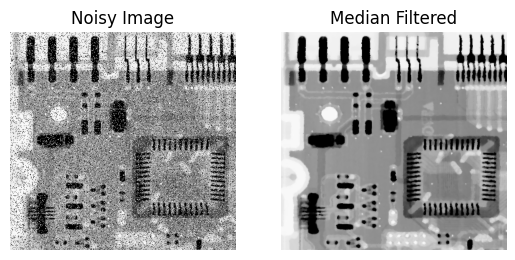

In [2]:
# Apply median filter with a 3x3 kernel
#ksize must be odd
median_filtered = cv2.medianBlur(img, 5)

# Display
plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title('Noisy Image'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(median_filtered, cmap='gray'); plt.title('Median Filtered'); plt.axis('off')
plt.show()

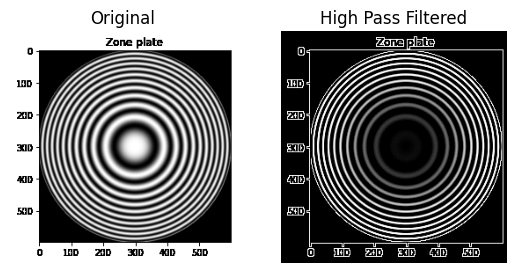

In [3]:
import numpy as np

img2 = cv2.imread(r"zone_plate.png")
hp_kernel = np.array([[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]])

# Apply kernel using filter2D
high_pass = cv2.filter2D(img2,-1,hp_kernel)

# Display
plt.subplot(1,2,1); plt.imshow(img2, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(high_pass, cmap='gray'); plt.title('High Pass Filtered'); plt.axis('off')
plt.show()

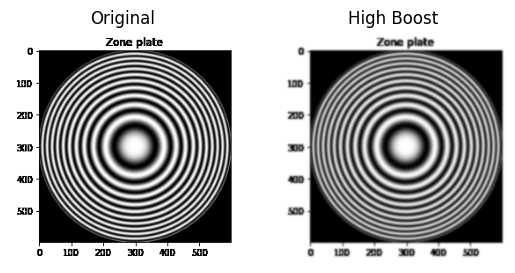

In [5]:
A = 0.1  # High boost factor (experiment with different values)

# Obtain low-pass (blurred) version
low_pass = cv2.GaussianBlur(img2, (5, 5), 0)

# High boost image
high_boost = cv2.addWeighted(img2, A, low_pass, (1-A), 0)
# high_boost = np.clip(high_boost, 0, 255).astype(np.uint8)

# Display
plt.subplot(1,2,1); plt.imshow(img2, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(high_boost, cmap='gray'); plt.title('High Boost'); plt.axis('off')
plt.show()

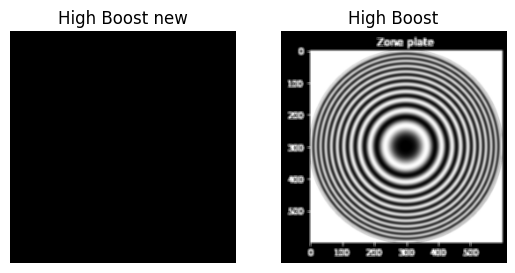

In [15]:
high_boost_kernel = np.array([[-1, -1, -1],
                      [-1,  9*A-1, -1],
                      [-1, -1, -1]])

high_boost_img=cv2.filter2D(img2,-1,high_boost_kernel)

plt.subplot(1,2,1); plt.imshow(high_boost_img, cmap='gray'); plt.title('High Boost new'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(high_boost, cmap='gray'); plt.title('High Boost'); plt.axis('off')
plt.show()

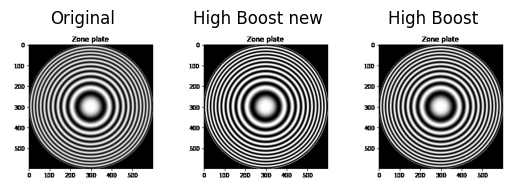

In [ ]:
img2_f = img2.astype(np.float32)
A=1.5
low_pass=cv2.GaussianBlur(img2,(5,5),0)
mask= img2_f-low_pass
hb=(img2+A*mask)
hb=np.clip(hb,0,255).astype(np.uint8)

plt.subplot(1,3,1); plt.imshow(img2, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(hb, cmap='gray'); plt.title('High Boost new'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(high_boost, cmap='gray'); plt.title('High Boost'); plt.axis('off')
plt.show()